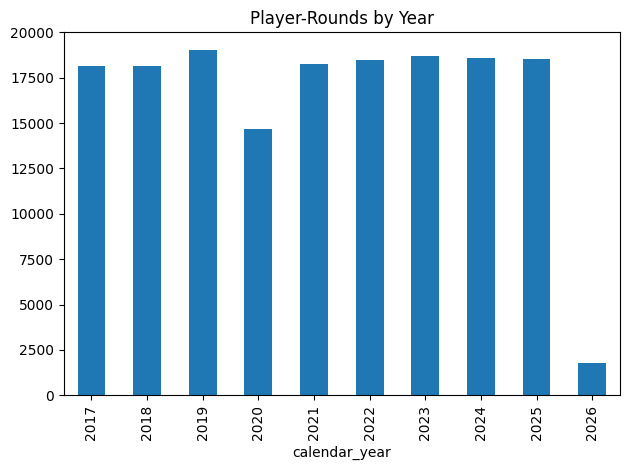

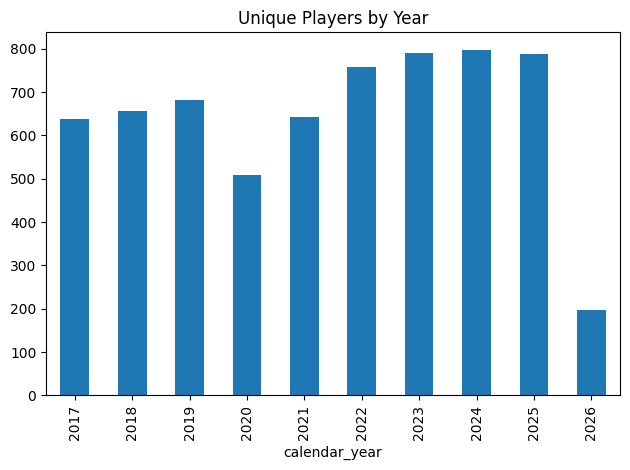

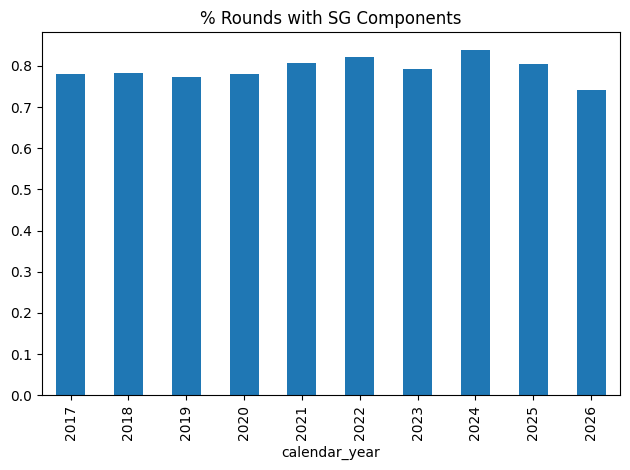

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/processed/master_rounds.parquet")

# How many player-rounds per year?
df.groupby('calendar_year').size().plot(kind='bar', title='Player-Rounds by Year')
plt.tight_layout()
plt.show()

# How many unique players per year?
df.groupby('calendar_year')['dg_id'].nunique().plot(kind='bar', title='Unique Players by Year')
plt.tight_layout()
plt.show()

# SG component availability by year
df.groupby('calendar_year')['has_sg_components'].mean().plot(
    kind='bar', title='% Rounds with SG Components'
)
plt.tight_layout()
plt.show()

Mean of round averages: -0.0000
Std of round averages:  0.0003


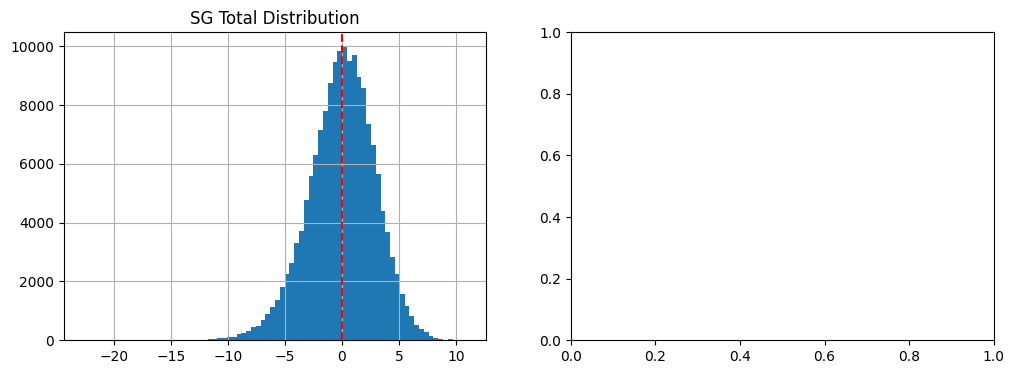

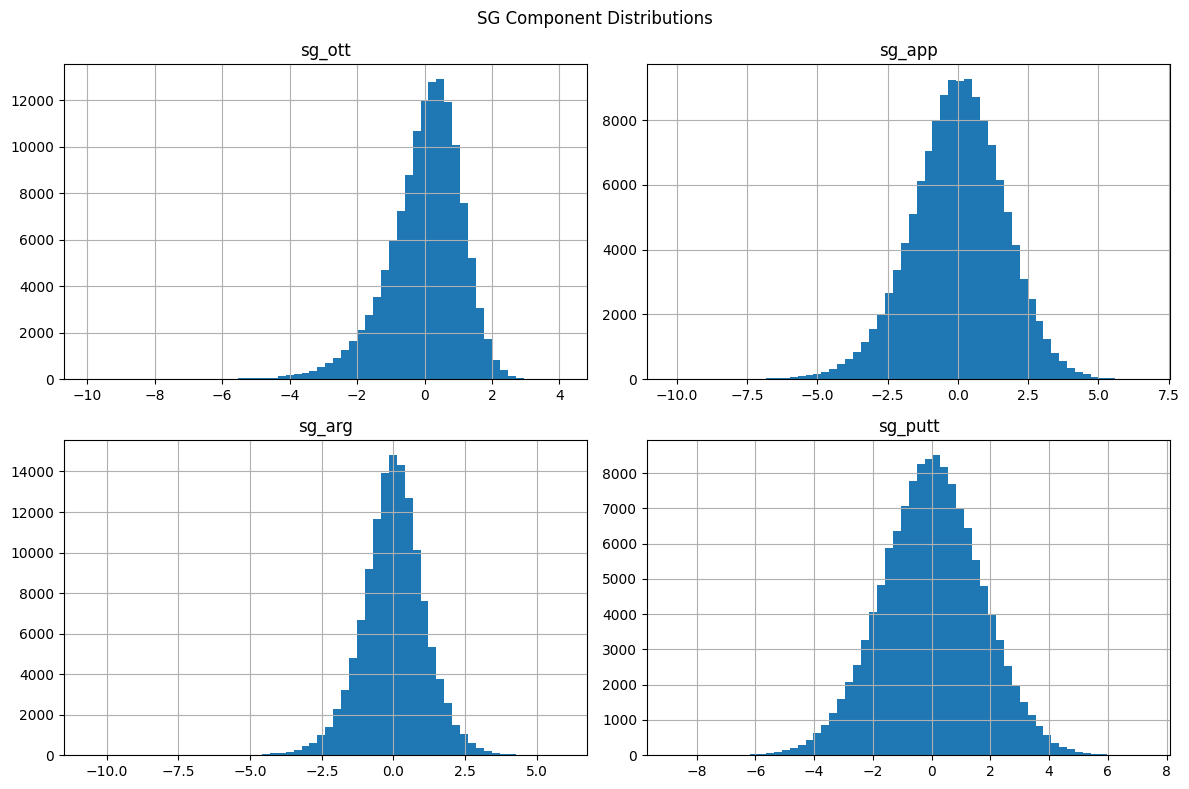

In [4]:
round_avgs = df.groupby('tourn_round_id')['sg_total'].mean()
print(f"Mean of round averages: {round_avgs.mean():.4f}")  # Should be ~0
print(f"Std of round averages:  {round_avgs.std():.4f}")    # Should be small

# Distribution of sg_total across all rounds
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['sg_total'].hist(bins=80, ax=axes[0])
axes[0].set_title('SG Total Distribution')
axes[0].axvline(0, color='red', linestyle='--')

# SG components distribution (Shotlink rounds only)
sg_df = df[df['has_sg_components']]
sg_cols = ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt']
sg_df[sg_cols].hist(bins=60, figsize=(12, 8))
plt.suptitle('SG Component Distributions')
plt.tight_layout()

In [5]:
# How much variance does each SG component explain?
sg_df = df[df['has_sg_components']].copy()

# Correlation of each component with total
for col in ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt']:
    corr = sg_df[col].corr(sg_df['sg_total'])
    var_pct = (sg_df[col].var() / sg_df['sg_total'].var()) * 100
    print(f"{col:8s}  corr={corr:.3f}  var_contribution={var_pct:.1f}%")

sg_ott    corr=0.419  var_contribution=14.2%
sg_app    corr=0.607  var_contribution=32.0%
sg_arg    corr=0.399  var_contribution=14.2%
sg_putt   corr=0.595  var_contribution=34.2%
